In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import cross_validation as cv
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [30]:
mm = pd.read_csv('moscow_train.csv')
print(mm.describe())
#print(mm[['latitude','longitude']])

        Unnamed: 0       room_id       host_id      reviews  \
count  5561.000000  5.561000e+03  5.561000e+03  5561.000000   
mean   2780.000000  8.769789e+06  3.016357e+07     5.112390   
std    1605.466755  4.585243e+06  2.639197e+07    13.487129   
min       0.000000  6.051200e+04  1.444400e+04     0.000000   
25%    1390.000000  5.038305e+06  5.710687e+06     0.000000   
50%    2780.000000  9.202036e+06  2.465345e+07     1.000000   
75%    4170.000000  1.310619e+07  4.754139e+07     4.000000   
max    5560.000000  1.540720e+07  9.836869e+07   253.000000   

       overall_satisfaction  accommodates     bedrooms    bathrooms  \
count           1667.000000   5561.000000  5542.000000  5210.000000   
mean               4.639772      3.864593     1.309094     1.206334   
std                0.483791      2.541633     0.792894     0.756769   
min                1.000000      1.000000     0.000000     0.000000   
25%                4.500000      2.000000     1.000000     1.000000   
50%   

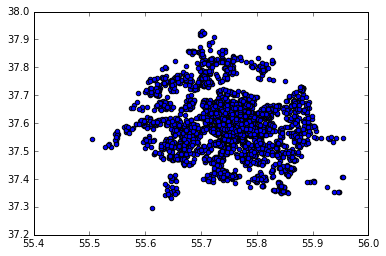

In [31]:
x = mm[['latitude']].values
y = mm[['longitude']].values 
plt.scatter(x, y)
plt.show()                              

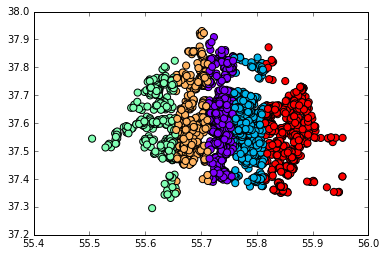

In [32]:
# k - means method
from sklearn.cluster import KMeans,DBSCAN
est = KMeans(5)  
est.fit(x)
y_kmeans = est.predict(x)
plt.scatter(x, y, c=y_kmeans, s=50, cmap='rainbow');
db = DBSCAN(eps=0.3, min_samples=10).fit(x)

In [33]:
# center
x_med = np.median(x)
y_med = np.median(y)
print(x_med)
print(y_med)

55.754696
37.594357


In [34]:
import math
def distance(x,y):
    distance = math.hypot(x - x_med, y - y_med)
    return distance    

In [35]:
print(distance(57,37))

1.3798703909661276


In [36]:
#new_feature = np.array(df['AGE'].values * df['INDUS'].values * math.exp(2))
#df.loc[:,'new_feature'] = pd.Series(new_feature, index=df.index)

In [37]:
out_center_distance = np.array([distance(x[i], y[i]) for i in range(len(x)) ])
# for i in range(len(x)):
#         out_center_distance[i] = distance(x[i], y[i])
print(out_center_distance)

[ 0.04307277  0.03140624  0.04233259 ...,  0.04984898  0.02364946
  0.02319203]


In [38]:
mm.loc[:,'out_center_distance'] = pd.Series(out_center_distance, index=mm.index)

In [39]:
mm.dropna
mm = mm.drop('host_id', axis=1)
mm = mm.drop('room_id', axis=1)
mm = mm.drop('latitude', axis=1)
mm = mm.drop('longitude', axis=1)

print(mm.describe())

        Unnamed: 0      reviews  overall_satisfaction  accommodates  \
count  5561.000000  5561.000000           1667.000000   5561.000000   
mean   2780.000000     5.112390              4.639772      3.864593   
std    1605.466755    13.487129              0.483791      2.541633   
min       0.000000     0.000000              1.000000      1.000000   
25%    1390.000000     0.000000              4.500000      2.000000   
50%    2780.000000     1.000000              5.000000      4.000000   
75%    4170.000000     4.000000              5.000000      4.000000   
max    5560.000000   253.000000              5.000000     16.000000   

          bedrooms    bathrooms         price      minstay  \
count  5542.000000  5210.000000   5554.000000  5335.000000   
mean      1.309094     1.206334     76.728664     1.736270   
std       0.792894     0.756769    318.460666     1.666063   
min       0.000000     0.000000      6.000000     1.000000   
25%       1.000000     1.000000     35.000000     

In [40]:
train = mm[:5000]
# nan to zeros overall_satisfaction bathrooms mintstay for train

# if len(train.overall_satisfaction[ train.overall_satisfaction.isnull() ]) > 0:
#     train.loc[ (train.overall_satisfaction.isnull()), 'overall_satisfaction'] = 0 # mb 1 is min
    
# if len(train.bathrooms[ train.bathrooms.isnull() ]) > 0:
#     train.loc[ (train.bathrooms.isnull()), 'bathrooms'] = 1 

    
# if len(train.minstay[ train.minstay.isnull() ]) > 0:
#     train.loc[ (train.minstay.isnull()), 'minstay'] = 1

# if len(train.bedrooms[ train.bedrooms.isnull() ]) > 0:
#     train.loc[ (train.bedrooms.isnull()), 'bedrooms'] = 1

# if len(train.price[ train.price.isnull() ]) > 0:
#     train.loc[ (train.price.isnull()), 'price'] = train['price'].median()   
train = train.dropna()    
#print(train)    
print(train.describe())


test = mm[5001:5561]
# if len(test.overall_satisfaction[ test.overall_satisfaction.isnull() ]) > 0:
#     test.loc[ (test.overall_satisfaction.isnull()), 'overall_satisfaction'] = 0 # mb 1 is min
    
# if len(test.bathrooms[ test.bathrooms.isnull() ]) > 0:
#     test.loc[ (test.bathrooms.isnull()), 'bathrooms'] = 1 

    
# if len(test.minstay[ test.minstay.isnull() ]) > 0:
#     test.loc[ (test.minstay.isnull()), 'minstay'] = 1
    
# if len(test.bedrooms[ test.bedrooms.isnull() ]) > 0:
#     test.loc[ (test.bedrooms.isnull()), 'bedrooms'] = 1

# if len(test.price[ test.price.isnull() ]) > 0:
#     test.loc[ (test.price.isnull()), 'price'] = test['price'].median()  
    
test = test.dropna()
print(test.describe())

        Unnamed: 0      reviews  overall_satisfaction  accommodates  \
count  1471.000000  1471.000000           1471.000000   1471.000000   
mean   2031.165194    16.146839              4.644460      3.783821   
std    1371.114735    20.003440              0.462213      2.170497   
min       8.000000     3.000000              2.000000      1.000000   
25%     838.500000     5.000000              4.500000      2.000000   
50%    1833.000000     9.000000              5.000000      4.000000   
75%    3165.000000    19.000000              5.000000      4.000000   
max    4990.000000   236.000000              5.000000     16.000000   

          bedrooms    bathrooms        price      minstay  out_center_distance  
count  1471.000000  1471.000000  1471.000000  1471.000000          1471.000000  
mean      1.324269     1.182189    57.802855     1.733515             0.063129  
std       0.827390     0.688671    36.192483     1.202474             0.056544  
min       0.000000     0.000000     

In [106]:
feature_labels = ['reviews','accommodates','bedrooms','bathrooms','price','minstay','out_center_distance']
idx = train[feature_labels].index
x_var = train.loc[idx, feature_labels].values
y_var = train['overall_satisfaction'].values
print(type(y_var), x_var.shape, y_var.shape)
print(x_var.shape)

<class 'numpy.ndarray'> (1471, 7) (1471,)
(1471, 7)


In [105]:
clf = RandomForestRegressor(n_estimators = 10, max_depth = None)
clf.fit(x_var, y_var)
predict = clf.predict(test[feature_labels].values)

print('test', clf.score(test[feature_labels].values, test['overall_satisfaction'].values))
print("Training Score: ", clf.score(x_var, y_var))

test -0.261209553159
Training Score:  0.827361582221


In [57]:
from sklearn.cross_validation import cross_val_score
y_true = train['overall_satisfaction'].values
precision = cross_val_score(clf, x_var, y_var, scoring='mean_squared_error')

print("Precision: %0.2f (+/- %0.2f)" % (precision.mean(), precision.std() * 2))
# print("Recall: %0.2f (+/- %0.2f)" % (recall.mean(), recall.std() * 2))
# print("F1: %0.2f (+/- %0.2f)" % (f_measure.mean(), f_measure.std() * 2))

Precision: -0.25 (+/- 0.03)


NameError: name 'recall' is not defined